<a href="https://colab.research.google.com/github/Ni7070/Genetic-ALgorithm/blob/master/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

naive approach

In [ ]:
import random

POPULATION_SIZE = 50

GENES = '1234567890'
TARGET = '321592'


class Individual(object):

    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(self):
        global GENES
        gene = random.choice(GENES)
        return gene

    @classmethod
    def create_chromosome(self):
        global TARGET
        chromosome_len = len(TARGET)
        return [self.mutated_genes() for _ in range(chromosome_len)]

    def mate(self, other_parent):
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, other_parent.chromosome):

            prob = random.random()

            if prob < 0.25:
                child_chromosome.append(gp1)

            elif prob < 0.96:
                child_chromosome.append(gp2)


            else:
                child_chromosome.append(self.mutated_genes())

        return Individual(child_chromosome)

    def cal_fitness(self):
        global TARGET
        fitness = 0
        for i, j in zip(self.chromosome, TARGET):
            if i != j:
                fitness += 1
        return fitness


def main():
    global POPULATION_SIZE

    generation = 1

    found = False
    population = []

    for i in range(POPULATION_SIZE):
        gnome = Individual.create_chromosome()
        population.append(Individual(gnome))

    while not found:

        population = sorted(population, key=lambda x: x.fitness)

        if population[0].fitness <= 0:
            found = True
            break

        new_generation = []

        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])

        s = int((90 * POPULATION_SIZE) / 100)
        for _ in range(s):
            parent1 = random.choice(population[:25])  # fittest ratio for next gen
            parent2 = random.choice(population[:25])  # take first 50th element from list
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print("Generation: {}\tIntermediate String: {}\tFitness: {}". \
              format(generation,
                     "".join(population[0].chromosome),
                     population[0].fitness))

        generation += 1

    print("Generation: {}\tModified String: {}\tFitness: {}". \
          format(generation,
                 "".join(population[0].chromosome),
                 population[0].fitness))


if __name__ == '__main__':
    main()

Generation: 1	Intermediate String: 402502	Fitness: 4
Generation: 2	Intermediate String: 402502	Fitness: 4
Generation: 3	Intermediate String: 121517	Fitness: 3
Generation: 4	Intermediate String: 121517	Fitness: 3
Generation: 5	Intermediate String: 521572	Fitness: 2
Generation: 6	Intermediate String: 521572	Fitness: 2
Generation: 7	Intermediate String: 521592	Fitness: 1
Generation: 8	Intermediate String: 521592	Fitness: 1
Generation: 9	Intermediate String: 521592	Fitness: 1
Generation: 10	Intermediate String: 521592	Fitness: 1
Generation: 11	Intermediate String: 521592	Fitness: 1
Generation: 12	Modified String: 321592	Fitness: 0


Using pyGAD


Fitting a Linear Model

` y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6`

In [2]:
!pip3 install pygad

     |████████████████████████████████| 53 kB 1.6 MB/s 


In [ ]:
import pygad

In [ ]:
function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

In [ ]:
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

In [ ]:
#Hyeperparameters
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 2.93763231  0.52297607  3.16096238  0.41050792 -1.25018062 -1.35470936]
Fitness value of the best solution = 16.55787355821015
Predicted output based on the best solution : 43.93960577144858


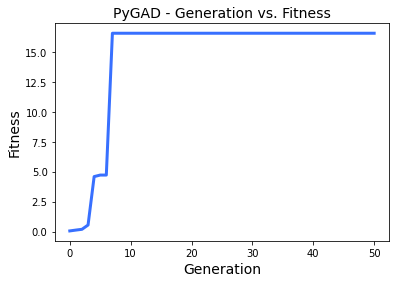

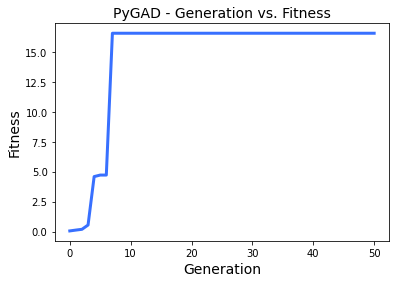

In [ ]:
ga_instance.plot_fitness()

Training Neural Network

In [ ]:
# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([0, 
                            1, 
                            1, 
                            0])

In [ ]:
import pygad.gann

num_inputs = data_inputs.shape[1] #2
num_classes = 2

num_solutions = 6 #number of individual in population
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [ ]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)
initial_population = population_vectors.copy()

num_parents_mating = 4

num_generations = 500

mutation_percent_genes = 5

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"

keep_parents = 1

init_range_low = -2
init_range_high = 5

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       callback_generation=callback_generation)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from 

In [ ]:
def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [ ]:
ga_instance.run()

Generation = 1
Fitness    = 75.0
Generation = 2
Fitness    = 75.0
Generation = 3
Fitness    = 75.0
Generation = 4
Fitness    = 75.0
Generation = 5
Fitness    = 75.0
Generation = 6
Fitness    = 75.0
Generation = 7
Fitness    = 100.0
Generation = 8
Fitness    = 100.0
Generation = 9
Fitness    = 100.0
Generation = 10
Fitness    = 100.0
Generation = 11
Fitness    = 100.0
Generation = 12
Fitness    = 100.0
Generation = 13
Fitness    = 100.0
Generation = 14
Fitness    = 100.0
Generation = 15
Fitness    = 100.0
Generation = 16
Fitness    = 100.0
Generation = 17
Fitness    = 100.0
Generation = 18
Fitness    = 100.0
Generation = 19
Fitness    = 100.0
Generation = 20
Fitness    = 100.0
Generation = 21
Fitness    = 100.0
Generation = 22
Fitness    = 100.0
Generation = 23
Fitness    = 100.0
Generation = 24
Fitness    = 100.0
Generation = 25
Fitness    = 100.0
Generation = 26
Fitness    = 100.0
Generation = 27
Fitness    = 100.0
Generation = 28
Fitness    = 100.0
Generation = 29
Fitness    = 100.0


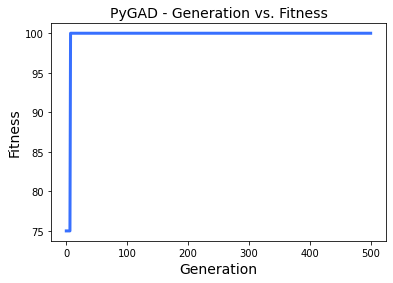

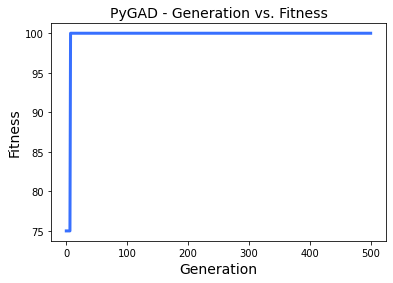

In [ ]:
ga_instance.plot_fitness()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [-7.62251492  3.75110366  3.18890777 -7.07462654  5.43113469  2.30481608
  7.66335147 -3.81683547]
Fitness value of the best solution = 100.0
Index of the best solution : 0


In [ ]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Best fitness value reached after 7 generations.


In [ ]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx], data_inputs=data_inputs)
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

Predictions of the trained network : [0, 1, 1, 0]


In [ ]:
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Number of correct classifications : 4.
Number of wrong classifications : 0.
Classification accuracy : 100.0.


How To Train pytorch Models Using the Genetic Algorithm with PyGAD

Regression problem

Generation = 1
Fitness    = 3.599344758207494
Generation = 2
Fitness    = 3.599344758207494
Generation = 3
Fitness    = 3.599344758207494
Generation = 4
Fitness    = 3.599344758207494
Generation = 5
Fitness    = 5.077266826492745
Generation = 6
Fitness    = 5.077266826492745
Generation = 7
Fitness    = 5.077266826492745
Generation = 8
Fitness    = 5.077266826492745
Generation = 9
Fitness    = 5.077266826492745
Generation = 10
Fitness    = 7.836537023273782
Generation = 11
Fitness    = 7.836537023273782
Generation = 12
Fitness    = 7.836537023273782
Generation = 13
Fitness    = 7.836537023273782
Generation = 14
Fitness    = 7.836537023273782
Generation = 15
Fitness    = 7.836537023273782
Generation = 16
Fitness    = 14.898430199425642
Generation = 17
Fitness    = 14.898430199425642
Generation = 18
Fitness    = 14.898430199425642
Generation = 19
Fitness    = 14.898430199425642
Generation = 20
Fitness    = 15.245617723029838
Generation = 21
Fitness    = 14.898430199425642
Generation = 22


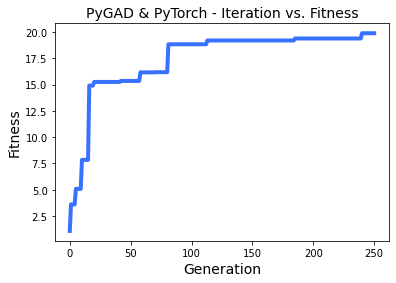

Fitness value of the best solution = 19.877098326591298
Index of the best solution : 1
Predictions : 
 [[0.17360193]
 [0.6111455 ]
 [1.1848347 ]
 [2.498676  ]]
Absolute Error :  0.050309144


In [3]:
import torch
import pygad.torchga
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    predictions = pygad.torchga.predict(model=model, 
                                        solution=solution, 
                                        data=data_inputs)
    abs_error = loss_function(predictions, data_outputs).detach().numpy() + 0.00000001

    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(3, 2)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(2, 1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            output_layer)
# print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = pygad.torchga.TorchGA(model=model,
                                 num_solutions=10)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor([[0.02, 0.1, 0.15],
                            [0.7, 0.6, 0.8],
                            [1.5, 1.2, 1.7],
                            [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = torch.tensor([[0.1],
                             [0.6],
                             [1.3],
                             [2.5]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

predictions = pygad.torchga.predict(model=model, 
                                    solution=solution, 
                                    data=data_inputs)
print("Predictions : \n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("Absolute Error : ", abs_error.detach().numpy())

Binary classification

In [ ]:
import torch
import pygad.torchga
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    predictions = pygad.torchga.predict(model=model, 
                                        solution=solution, 
                                        data=data_inputs)

    solution_fitness = 1.0 / (loss_function(predictions, data_outputs).detach().numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer  = torch.nn.Linear(2, 4)
relu_layer = torch.nn.ReLU()
dense_layer = torch.nn.Linear(4, 2)
output_layer = torch.nn.Softmax(1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            dense_layer,
                            output_layer)
# print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = pygad.torchga.TorchGA(model=model,
                                 num_solutions=10)

loss_function = torch.nn.BCELoss()

# XOR problem inputs
data_inputs = torch.tensor([[0.0, 0.0],
                            [0.0, 1.0],
                            [1.0, 0.0],
                            [1.0, 1.0]])

# XOR problem outputs
data_outputs = torch.tensor([[1.0, 0.0],
                             [0.0, 1.0],
                             [0.0, 1.0],
                             [1.0, 0.0]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights.

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

# Start the genetic algorithm evolution.
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

predictions = pygad.torchga.predict(model=model, 
                                    solution=solution, 
                                    data=data_inputs)
print("Predictions : \n", predictions.detach().numpy())

# Calculate the binary crossentropy for the trained model.
print("Binary Crossentropy : ", loss_function(predictions, data_outputs).detach().numpy())

# Calculate the classification accuracy of the trained model.
a = torch.max(predictions, axis=1)
b = torch.max(data_outputs, axis=1)
accuracy = torch.true_divide(torch.sum(a.indices == b.indices), len(data_outputs))
print("Accuracy : ", accuracy.detach().numpy())

knapsack using pygad

In [ ]:
function_inputs = [4,-2,3.5,5,-11,-4.7]